In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [6]:
nyc = pd.read_csv("AB_NYC_2019.csv")
nyc.sort_values(by='id').head(15)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188


In [10]:
neighbourhood = pd.read_excel("neighborhood group.xlsx")
neighbourhood.head()

,id,neighbourhood_group
0,36442252.0,Bronx
1,36435986.0,Bronx
2,36429652.0,Bronx
3,36428186.0,Bronx
4,36426093.0,Bronx


In [9]:
## Aggregated dataframe
df = nyc.merge(neighbourhood, how='outer', on='id')
colnames = list(df.columns)
df = df[colnames[0:5] + [colnames[-1]] + colnames[5:14]]

df.head()

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,Brooklyn,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1


In [11]:
bronx = df.loc[df['neighbourhood_group']=='Bronx']
brooklyn = df.loc[df['neighbourhood_group']=='Brooklyn']
manhattan = df.loc[df['neighbourhood_group']=='Manhattan']
queens = df.loc[df['neighbourhood_group']=='Queens']
staten = df.loc[df['neighbourhood_group']=='Staten Island']

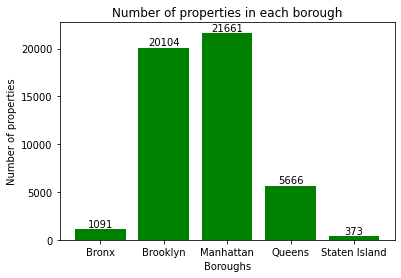

In [12]:
## Presence around New York
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
property_count = [len(bronx.index), len(brooklyn.index), len(manhattan.index), len(queens.index), len(staten.index)]
plt.figure()
plt.bar(boroughs, property_count, color='green')
plt.title('Number of properties in each borough')
plt.xlabel('Boroughs')
plt.ylabel('Number of properties')
for i in range(len(boroughs)):
  plt.text(i, property_count[i], property_count[i], ha='center', va='bottom')
plt.savefig('location.png')
plt.show()

In [13]:
## Fill NA with 0 in the 'reviews_per_month' column
bronx['reviews_per_month'].fillna(0)
brooklyn['reviews_per_month'].fillna(0)
manhattan['reviews_per_month'].fillna(0)
queens['reviews_per_month'].fillna(0)
staten['reviews_per_month'].fillna(0)

169      1.66
249      1.85
250      1.44
251      1.71
256      3.19
         ... 
48441    0.00
48446    0.00
48533    0.00
48649    0.00
48799    1.00
Name: reviews_per_month, Length: 373, dtype: float64

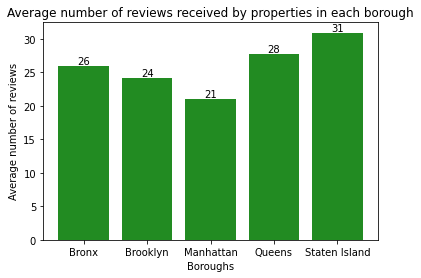

In [14]:
## Infer quality of the properties by average number of reviews received
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
reviews = [bronx['number_of_reviews'].sum(), brooklyn['number_of_reviews'].sum(), manhattan['number_of_reviews'].sum(), queens['number_of_reviews'].sum(), staten['number_of_reviews'].sum()]
avg_reviews = []
for i in range(5):
  avg_reviews.append(reviews[i] / property_count[i])
plt.bar(boroughs, avg_reviews, color='forestgreen')
plt.title('Average number of reviews received by properties in each borough')
plt.xlabel('Boroughs')
plt.ylabel('Average number of reviews')
for i in range(len(boroughs)):
  plt.text(i, avg_reviews[i], round(avg_reviews[i]), ha='center', va='bottom')
plt.show()

In [15]:
## Split dataset for each borough
bronx.to_csv("bronx.csv")
brooklyn.to_csv("brooklyn.csv")
manhattan.to_csv("manhattan.csv")
queens.to_csv("queens.csv")
staten.to_csv("staten_island.csv")

# Characteristics of Bronx


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


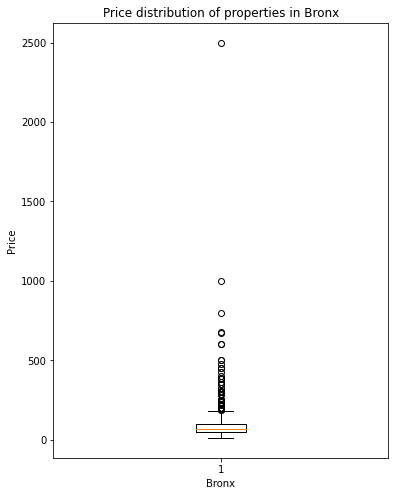

In [29]:
# Check distribution of price in Bronx
bronx_median = bronx['price'].median()
bronx['price'].replace(0, 65, inplace=True)
bronx['price'].describe()

plt.figure(figsize=(6,8))
plt.boxplot(bronx['price'])
plt.title('Price distribution of properties in Bronx')
plt.xlabel('Bronx')
plt.ylabel('Price')
plt.show()

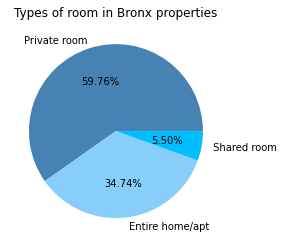

In [20]:
bronx_private = bronx.loc[bronx['room_type']=='Private room'].count()[0]
bronx_apt = bronx.loc[bronx['room_type']=='Entire home/apt'].count()[0]
bronx_shared = bronx.loc[bronx['room_type']=='Shared room'].count()[0]
labels = ['Private room', 'Entire home/apt', ' Shared room']
colors = ['steelblue', 'lightskyblue', 'deepskyblue']
plt.figure()
plt.pie([bronx_private, bronx_apt, bronx_shared], labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Types of room in Bronx properties')
plt.show()

# Characteristics of Brooklyn

count    20104.000000
mean       124.423498
std        186.856417
min         10.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


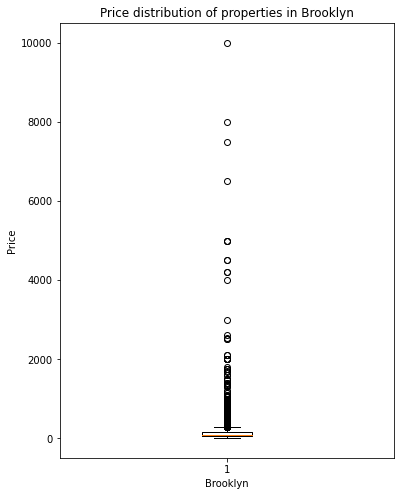

In [21]:
brooklyn_median = brooklyn['price'].median()
brooklyn['price'].replace(0, brooklyn_median, inplace=True)
print(brooklyn['price'].describe())
plt.figure(figsize=(6,8))
plt.boxplot(brooklyn['price'])
plt.title('Price distribution of properties in Brooklyn')
plt.xlabel('Brooklyn')
plt.ylabel('Price')
plt.show()

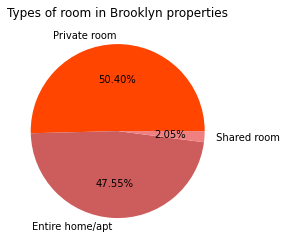

In [22]:
brooklyn_private = brooklyn.loc[brooklyn['room_type']=='Private room'].count()[0]
brooklyn_apt = brooklyn.loc[brooklyn['room_type']=='Entire home/apt'].count()[0]
brooklyn_shared = brooklyn.loc[brooklyn['room_type']=='Shared room'].count()[0]
labels = ['Private room', 'Entire home/apt', ' Shared room']
colors = ['orangered', 'indianred', 'lightcoral']
plt.figure()
plt.pie([brooklyn_private, brooklyn_apt, brooklyn_shared], labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Types of room in Brooklyn properties')
plt.show()

# Characteristics of Manhattan

count    21661.000000
mean       196.882739
std        291.380286
min         10.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


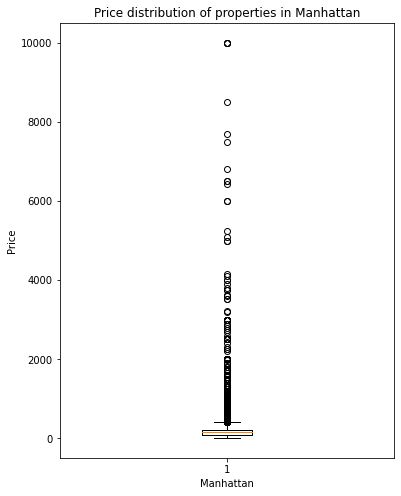

In [23]:
manhattan_median = manhattan['price'].median()
manhattan['price'].replace(0, manhattan_median, inplace=True)
print(manhattan['price'].describe())
plt.figure(figsize=(6,8))
plt.boxplot(manhattan['price'])
plt.title('Price distribution of properties in Manhattan')
plt.xlabel('Manhattan')
plt.ylabel('Price')
plt.show()

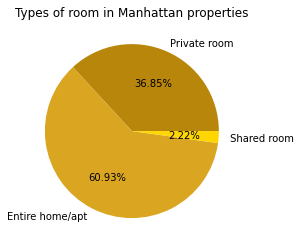

In [24]:
manhattan_private = manhattan.loc[manhattan['room_type']=='Private room'].count()[0]
manhattan_apt = manhattan.loc[manhattan['room_type']=='Entire home/apt'].count()[0]
manhattan_shared = manhattan.loc[manhattan['room_type']=='Shared room'].count()[0]
labels = ['Private room', 'Entire home/apt', ' Shared room']
colors = ['darkgoldenrod', 'goldenrod', 'gold']
plt.pie([manhattan_private, manhattan_apt, manhattan_shared], labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Types of room in Manhattan properties')
plt.show()

# Characteristics of Queens

count     5666.000000
mean        99.517649
std        167.102155
min         10.000000
25%         50.000000
50%         75.000000
75%        110.000000
max      10000.000000
Name: price, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


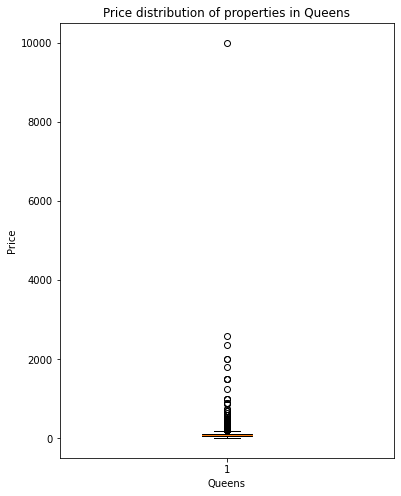

In [25]:
queens_median = queens['price'].median()
queens['price'].replace(0, queens_median, inplace=True)
print(queens['price'].describe())
plt.figure(figsize=(6,8))
plt.boxplot(queens['price'])
plt.title('Price distribution of properties in Queens')
plt.xlabel('Queens')
plt.ylabel('Price')
plt.show()

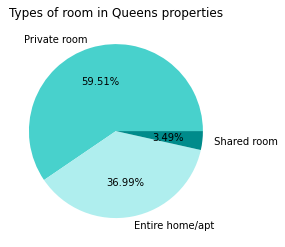

In [26]:
queens_private = queens.loc[queens['room_type']=='Private room'].count()[0]
queens_apt = queens.loc[queens['room_type']=='Entire home/apt'].count()[0]
queens_shared = queens.loc[queens['room_type']=='Shared room'].count()[0]
labels = ['Private room', 'Entire home/apt', ' Shared room']
colors = ['mediumturquoise', 'paleturquoise', 'darkcyan']
plt.pie([queens_private, queens_apt, queens_shared], labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Types of room in Queens properties')
plt.show()

# Characteristics of Staten Island

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


count     373.000000
mean      114.812332
std       277.620403
min        13.000000
25%        50.000000
50%        75.000000
75%       110.000000
max      5000.000000
Name: price, dtype: float64


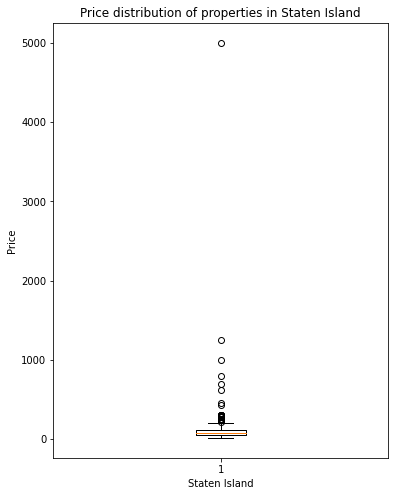

In [27]:
staten_median = staten['price'].median()
staten['price'].replace(0, staten_median, inplace=True)
print(staten['price'].describe())
plt.figure(figsize=(6,8))
plt.boxplot(staten['price'])
plt.title('Price distribution of properties in Staten Island')
plt.xlabel('Staten Island')
plt.ylabel('Price')
plt.show()

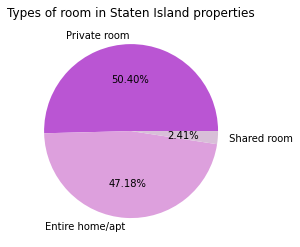

In [28]:
staten_private = staten.loc[staten['room_type']=='Private room'].count()[0]
staten_apt = staten.loc[staten['room_type']=='Entire home/apt'].count()[0]
staten_shared = staten.loc[staten['room_type']=='Shared room'].count()[0]
labels = ['Private room', 'Entire home/apt', ' Shared room']
colors = ['mediumorchid', 'plum', 'thistle']
plt.pie([staten_private, staten_apt, staten_shared], labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Types of room in Staten Island properties')
plt.show()